# PROJEKT RÓWNANIA RÓŻNICZKOWE W TECHNICE - MODELE DEMOGRAFICZNE

### Model Malthusa

W 1798 roku ekonomista angielski Thomas Malthus sformułował teorię geometrycznego wzrostu ludności. Przy jednoczesnym założeniu arytmetycznego wzrostu produkcji żywności, teoria ta miała wyjaśnić przyczyny zubożenia ludności. 
Teoria ta bazuje na prostym założeniu, że przyrost populacji jest proporcjonalny do całkowitej liczby ludności. Stała $ \lambda $ jest współczynnikiem wzrostu populacji i często nazywana jest współczynnikiem Malthusa.

$ N'(t) = \lambda N(t). $

Model ten dobrze sprawdza przy dużych populacjach.

Model Malthusa dobrze opisuje wzrost populacji żyjącej w idealnie korzystnych warunkach, np. bakterie w laboratorium.

### Model Verhulsta

W przypadku populacji żyjącej w środowisku o ograniczonych zasobach należy zmodyfikować model Malthusa w ten sposób, aby tempo wzrostu populacji malało wraz ze wzrostem jej wielkości. Taki model zaproponował w 1845 roku Verhulst.

Verhulst przyjął, że istnieje optymalna wielkość populacji żyjącej w danym środowisku, oznaczył ją przez $ K. $ Założył, że współczynnik wzrostu populacji maleje liniowo w stosunku do wielkości populacji. Przyjmując, że dla $ N = 0 $ wynosi on $ \lambda $, a dla $ N = K $ wynosi 0, otrzymujemy nowe równanie opisujące wielkość populacji.
 
$ N'(t) = \lambda N(t) \Big(1 - \dfrac{N(t)}{K} \Big). $

Model Verhulsta można uzasadnić, rozpatrując zależność między wielkością populacji $ N(t) $ , a ilością pożywienia $ P(t) . $ Przyjmujemy, że współczynnik wzrostu populacji jest proporcjonalny do ilości pożywienia, oraz że ilość pożywienia maleje proporcjonalnie do wielkości populacji. Mamy więc następujące zależności:

$ \dfrac{N'(t)}{N(t)} = aP(t), $

$P'(t) = -b N'(t). $

Wnioskujemy, że $ N'(t) = aN(t)P(t) $ oraz $ P(t) = M − bN(t) $ , gdzie $ M $ jest pewną stałą, a stąd

$ N'(t) = aN(t)\Big(M − bN(t)\Big). $

Podstawiając $ λ = aM $ i $ K = \dfrac{M}{b} $ otrzymujemy 

$ N'(t) = \lambda N(t) \Big(1 - \dfrac{N(t)}{K} \Big) .$


### Równanie bilansu

Równanie bilansu dla pojedynczej populacji. Ilość osobników w populacji zależy od ilości urodzin i śmiertelności oraz imigracja i emigracja. Przyjmujemy, że $ B(t), D(t), E(t) $ i $ I(t) $ oznaczają odpowiednio, ilość urodzin (birth), śmierci (death), emigracji i imigracji w jednostce czasu.

$ N’(t) = B(t) − D(t) + I(t) − E(t). $

Inny sposób zapisu tego równania jest za pomocą współczynników per capita, czyli np. ilość urodzin przypadających na jednego osobnika wynosi $ b(t) = \dfrac{B(t)}{N(t)} . $ Ma wtedy ono postać

$ N’(t) = (b(t) − d(t) + i(t) − e(t)) N(t) . $

Problemem jest współczynnik $ i(t) $, ponieważ założenie, że imigracja jest proporcjonalna do ilości osobników nie ma sensu, zwłaszcza gdy rozważamy migrację na puste terytorium. Rozważymy zatem równanie

$ N’(t) = (b(t) − d(t) − e(t)) N(t) + I(t) . $


## CZĘŚĆ BADAWCZA

W tej części będziemy badać jak zmieniała się liczność populacji w Polsce w latach 1950 - 2020 oraz w jaki sposób mogłaby się zmienić do 2100 roku. Użyjemy do tego modelu Malthusa, modelu Verhulsta oraz równania bilansu, a punktem odniesienia będą przewidywania naukowe. Sprawdzimy który z wybranych modeli jest najbardziej rzetelny. Przewidując w jaki sposób wzrośnie lub zmaleje liczba ludności w Polsce do 2100 roku, rozważymy dwie różne sytuacje oraz przekonamy się, czy któraś z nich pokrywa się lub jest bliska przewidywaniom naukowców.

In [1]:
import pandas as pd
import os
import math
import cmath
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
tabela = pd.read_csv(r'C:\Users\julia\Desktop\v\studia\semestr 3\równania różniczkowe  w technice\projekt\tabela.csv', 
                     usecols=['Time', 'PopTotal', 'Location', 'Variant'], index_col='Time')

tabela = tabela[(tabela.Location == 'Poland') & (tabela.Variant == 'Medium')]

tabela_pop = tabela.PopTotal * 1000

In [3]:
tabela_pop[2100]

23032569.0

Poniżej przedstawiamy wykres opisujący przewidywania naukowców. Jak widać w przeciągu 80 lat populacja w naszym kraju ma zmaleć z obecnych 37,8 mln aż do 23 mln.

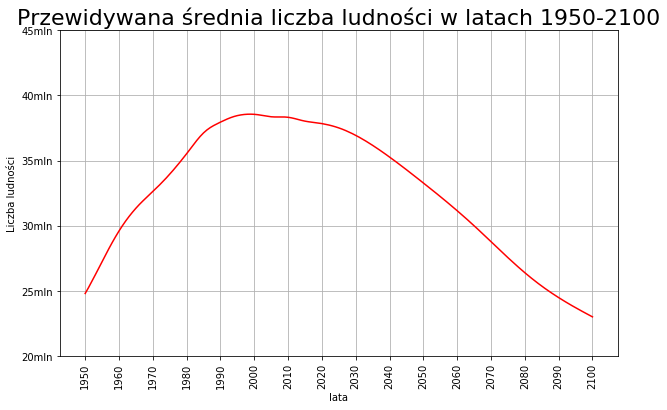

In [4]:
plt.rcParams['figure.figsize'] = 10,6
plt.plot(tabela_pop.index, tabela_pop, c='Red')
plt.xticks(list(range(1950,2110,10)), rotation='vertical')
plt.yticks(list(range(2*10**7, 5*10**7, 5*10**6)), 
               ['20mln', '25mln', '30mln', '35mln', '40mln', '45mln', '50mln'])
plt.xlabel('lata')
plt.ylabel('Liczba ludności')
plt.title("Przewidywana średnia liczba ludności w latach 1950-2100", size = 22)
plt.grid()
plt.show()

##### Model Malthusa

Aby skorzystać z modelu Malthusa musimy wyliczyć lambdę.
Weźmy  $ N_{0} $ równe liczbie ludności w 1950 roku. Weźmy także $ N_{70} $ równe liczbie ludności w 2020 roku.

$ N_{0} = 24824007 $

$ N_{70} = 37846605 $

$ N'(t) = \lambda N(t) $

$ N(t) = Ae ^ {\lambda t} $

$ N_{0} = N(0) = A = 24824007 $

$ N(t) = 24824007 \cdot e ^ {\lambda t} $

$ N_{70} = N(70) = 24824007 \cdot e ^ {\lambda 70} = 37846605 $

$ e ^ {\lambda 70} = 1.524596935539053 $

$ \lambda \cdot 70 = \ln (1,52459694) $

$ \lambda \cdot 70 = 0,42173 $

$ \lambda = 0,006 $

Pochodna $ N'(t) $ oznacza zmianę liczby ludności, a więc możemy ją inaczej zapisać jako $ N_{k} - N_{p} $, gdzie $ N_{k} $ oznacza końcową liczbę populacji, a $ N_{p} $ początkową liczbę populacji. Nasz model będzie zatem wyglądać następująco:

$ N_{k} - N_{p} = \lambda N_{p} $. 

Chcąc wyliczyć końcową liczbę ludności przekształcamy wzór i otrzymujemy:

$ N_{k} = N_{p} + \lambda N_{p}. $

In [5]:
def Malthus(t1, t2):
    liczba_ludności = [tabela_pop[t1]]
    N = tabela_pop[t1]
    for i in range(t1, t2):
        Nk = 0.006*N + N
        liczba_ludności.append(Nk)
        N = Nk
    return(liczba_ludności)

In [6]:
round(Malthus(1960,2100)[140])

68425396.0

Według modelu Malthusa w 2100 w Polsce liczba ludności będzie wynosić 68425396, czyli prawie dwa razy więcej niż w obecnym roku.

##### Model Mathulsa wyliczony metodą Eulera

Porównajmy model Malthusa liczony naszą metodą z metodą Eulera i Rungego-Kutty rzędu 4.

Metoda Eulera

In [7]:
def dN_dt(x):
    return lam * x

lam = 0.006
h = 0.5
N0 = 24824007

t = np.arange(0, 150, h)
N = np.zeros(len(t))

N[0] = N0

for i in range(1, len(t)):
    N[i] = N[i-1] + dN_dt(N[i-1]) * h

Metoda Rungego-Kutty

In [8]:
def f(x, y):
    return lam * y


lam = 0.006
h = 0.5
N0 = 24824007

t = np.arange(0, 150, h)
N2 = np.zeros(len(t))
x0 = 0
    
for i in range(len(t)):
    k1 = h * (f(x0, N0))
    k2 = h * (f((x0+h/2), (N0+k1/2)))
    k3 = h * (f((x0+h/2), (N0+k2/2)))
    k4 = h * (f((x0+h), (N0+k3)))
    k = (k1 + 2*k2 + 2*k3 + k4)/6
    N2[i] = N0 + k
    N0 = N0 + k
    x0 = x0 + h


Sprawdźmy na wykresie jak wyglądają nasze funkcje oraz czy czymś się różnią.

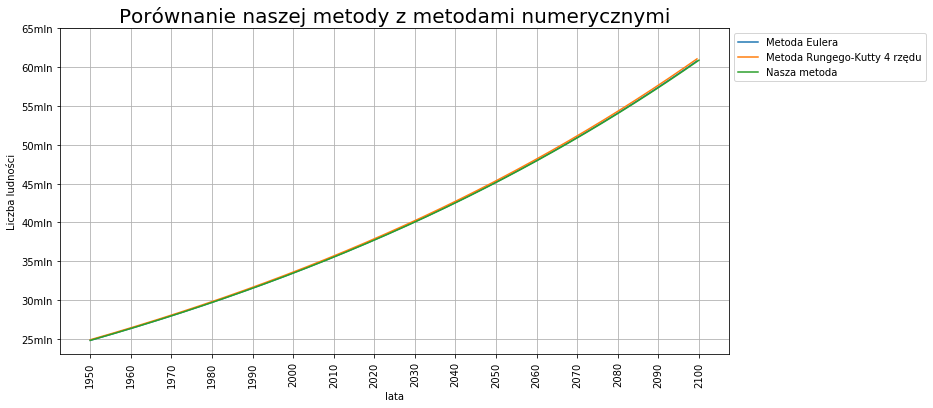

In [9]:
plt.rcParams['figure.figsize'] = 12,6
plt.plot(t, N, label = 'Metoda Eulera')
plt.plot(t, N2, label = 'Metoda Rungego-Kutty 4 rzędu')
plt.plot(Malthus(1950,2100), label = 'Nasza metoda')
plt.xlabel('lata')
plt.ylabel('Liczba ludności')
plt.legend(loc = 'Upper Left', bbox_to_anchor=(1,1))
plt.xticks(list(range(0,160,10)), ['1950', '1960', '1970', '1980', '1990','2000', '2010', '2020', '2030', '2040',
                                       '2050', '2060', '2070', '2080', '2090', '2100', '2110'], rotation = 'vertical')
plt.yticks(list(range(25*10**6, 7*10**7, 5*10**6)), 
           ['25mln', '30mln', '35mln', '40mln', '45mln', '50mln','55mln', '60mln', '65mln', '70mln'])
plt.title("Porównanie naszej metody z metodami numerycznymi", size = 20)
plt.grid()
plt.show()

Jak widać wybranie metody rozwiązania równania Malthusa nie ma wpływu na wynik, ponieważ wykresy pokrywają się.
Dlatego w dalszej części projektu wybieramy tylko jedną z nich.

##### Model Verhulsta

Biorąc równanie modelu Verhulsta wyprowadzone na wykładzie mamy 

$ N(t) = \dfrac{1}{\frac{1}{K}-\Big(\frac{1}{N_0} - \frac{1}{K}\Big)e^{-\lambda t}}. $

Przyjmujemy, że $ N_0 = 24624007 $ oraz $ K = 38567868. $ 

Po przekształceniu dostajemy wzór na lambde równy 

$ \lambda = \dfrac{- \ln{\Big( \frac{\frac{1}{N} - \frac{1}{K}} {\frac{1}{N_0} - \frac{1}{K}}\Big)}}{t}. $ 

Weźmy punkt $ (50, N(50)) . $

Otrzymujemy lambde równą $ \lambda = 0,1516. $ 

Analogicznie do przekształceń przy modelu Malthusa, otrzymujemy wzór na końcową liczbę populacji:

$ N_{k} = \dfrac{1}{\frac{1}{K}-\Big(\frac{1}{y_0} - \frac{1}{K}\Big)e^{-\lambda t}}. $

In [10]:
def Verhulst(t1, t2):
    liczba_ludności = [tabela_pop[t1]]
    N0 = tabela_pop[t1]
    lam = 0.1516
    k = 38567868
    for i in range(t1-1950, t2-1950):
        Nk = 1 / ((1/k) - (1/k - 1/N0)* math.exp(-lam*i))
        liczba_ludności.append(Nk)
    return(liczba_ludności)

In [11]:
round(Verhulst(1960,2100)[140])

38567868.0

Według modelu Verhulsta w 2100 w Polsce liczba ludności będzie wynosić 38567868, czyli prawie tyle co w obecnym roku.

##### Równanie bilansu

Poniżej znajdują się tabele z liczbami żywych urodzeń, zgonów, emigracji oraz migracji w naszym kraju w latach 1960 - 2019. Dane te są nam potrzebne do napisania równania bilansu.

In [12]:
tabela_urodzeń = [669485, 627624, 599505, 589349, 563921, 547397, 531316, 521817, 525751, 532828, 
                  547819, 564381, 577893, 600862, 623650, 646381, 672864, 665221, 669312, 691229, 
                  695759, 681657, 705356, 723605, 701720, 680091, 637213, 607790, 589938, 564431, 
                  547720, 547719, 515214, 494310, 481285, 433109, 428203, 412635, 395619, 382002, 
                  378348, 368205, 353765, 351072, 356131, 364383, 374244, 387873, 414499, 417589, 
                  413300, 388416, 386257, 369576, 375160, 369308, 382257, 401982, 388178]

tabela_śmierci = [224167, 227759, 239199, 231186, 236985, 232421, 232945, 247705, 244103, 
                  264516, 266799, 283702, 265250, 279491, 277085, 296896, 304057, 312956, 
                  328080, 325984, 350203, 328923, 337874, 352255, 367562, 383987, 378781, 
                  380663, 373018, 383074, 390343, 405716, 394729, 392259, 386398, 386084, 
                  385496, 380201, 375354, 381415, 368028, 363220, 359486, 365230, 363522, 
                  368285, 369686, 377226, 379399, 384940, 378478, 375501, 384788, 387312, 
                  376467, 394921, 388009, 402852, 414200 ]

tabela_emigracji = [28000, 28000, 28000, 28000, 28000, 28600, 28600, 28600, 28600, 28600,
                    14100, 14100, 14100, 14100, 14100, 9600, 9600, 9600, 9600, 9600,
                    22700, 22700, 22700, 22700, 22700, 20500, 20500, 20500, 20500, 20500,
                    18440, 20977, 18115, 21376, 25904, 26344, 21297, 20222, 22177, 21536, 
                    26999, 23368, 24532, 20813, 18877, 22242, 46936, 35480, 30140, 229320, 
                    208126, 265798, 275603, 276446, 268299, 258837, 236441, 218492, 189794]

tabela_imigracji = [5700, 5700, 5700, 5700, 5700, 2200, 2200, 2200, 2200, 2200,
                    1900, 1900, 1900, 1900, 1900, 1800, 1800, 1800, 1800, 1800,
                    1500,  1500,  1500,  1500,  1500, 1600, 1600, 1600, 1600, 1600, 
                    2626, 5040, 6512, 5924, 6907, 8121, 8186, 8426, 8916, 7525, 
                    7331, 6625, 6587, 7048, 9495, 9364, 10802, 14995, 15275, 189166, 
                    155131, 157059, 217546, 220311, 222275, 218147, 208302, 209353, 214083]

In [13]:
def równanie_bilansu(t1, t2):
    liczba_ludności = [tabela_pop[t1]]
    N = tabela_pop[t1]
    for k in range(t1, t2):
        b = tabela_urodzeń[k-1960]
        d = tabela_śmierci[k-1960]
        e = tabela_emigracji[k-1960]
        i = tabela_imigracji[k-1960]
        Pr = b - d - e + i
        liczba_ludności.append(N + Pr)
        N += Pr
    return(liczba_ludności)

Przedstawimy teraz porównanie 4 wykresów opisujących liczbę ludności w Polsce w latach 1960 - 2019.

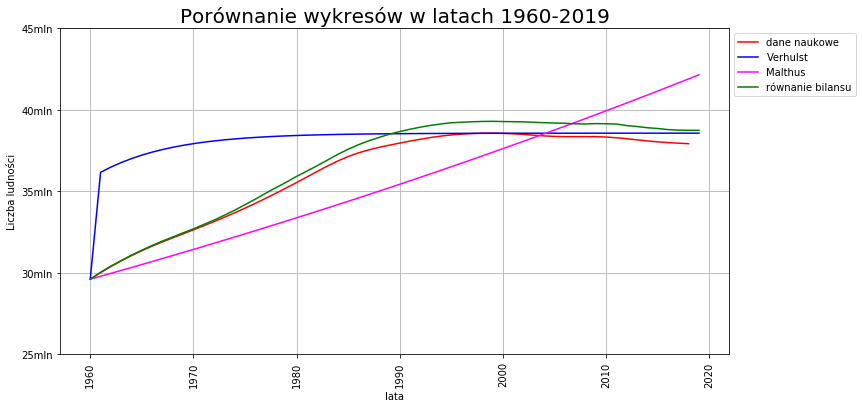

In [14]:
def porównanie(t1, t2):
    
    t = range(t1, t2+1)
    N1 = Verhulst(t1, t2)
    N2 = Malthus(t1, t2)
    N3 = równanie_bilansu(t1, t2)
    
    plt.rcParams['figure.figsize'] = 12,6
     
    plt.plot(tabela_pop.index[t1-1950 : t2-1950], tabela_pop[t1-1950 : t2-1950], c='Red', label = 'dane naukowe') 
    plt.plot(t,N1, label = 'Verhulst', c = 'Blue')
    plt.plot(t,N2, label = 'Malthus', c = 'Magenta')
    plt.plot(t,N3, label = "równanie bilansu", c = 'Green') 
    plt.xlabel('lata')
    plt.ylabel('Liczba ludności')
    plt.legend(loc = 'Upper Left', bbox_to_anchor=(1,1))
    plt.xticks(list(range(t1,t2+10,10)), rotation='vertical')
    plt.yticks(list(range(25*10**6, 5*10**7, 5*10**6)), 
               ['25mln', '30mln', '35mln', '40mln', '45mln', '50mln'])
    plt.title("Porównanie wykresów w latach 1960-2019", size = 20)
    plt.grid()
    plt.show()
    
porównanie(1960,2019)

Jak możemy zauważyć najlepiej sprawdziło się tutaj równanie bilansu, które praktycznie pokrywa się z danymi naukowymi. Mogą się one różnić, ponieważ nasze dane pochodzą z dwóch różnych stron. 

Mogłoby się wydawać, że funkcja modelu Verhulsta jest od pewnego momentu stała, co jest nieprawdą. Pokażemy to sprawdzając wartości na przełomie 5 lat.

In [15]:
Verhulst(2000, 2005)

[38556699.0,
 38567862.29589067,
 38567863.09827653,
 38567863.78779237,
 38567864.38031536,
 38567864.88948932]

Jak widać nasza funkcja rośnie. Są to jednak tak małe wartości, że nie jesteśmy w stanie dostrzec ich zmiany na wykresie porównawczym.

##### Równanie bilansu do 2100 roku

Aby rozwiązać równanie bilansu na przyszłe 80 lat, musimy przyjąć pewne założenia, które będą dotyczyć zmian liczby urodzeń, zgonów, emigracji i imigracji. Przyjrzyjmy się najpierw jak te zmiany wyglądały od 1960 do 2019 roku. Dla lepszego zobrazowania przedstawimy je na wykresach.

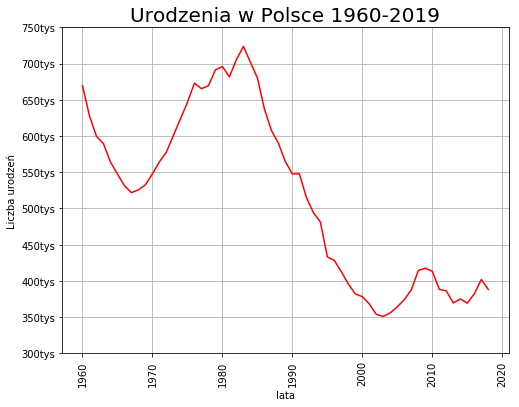

In [16]:
plt.rcParams['figure.figsize'] = 8,6
plt.plot(tabela_urodzeń, c = 'Red')
plt.xticks(list(range(0, 70, 10)), ['1960', '1970', '1980', '1990','2000', '2010', '2020'], rotation = 'vertical')
plt.yticks(list(range(3*10**5, 8*10**5, 5*10**4)), 
           ['300tys', '350tys', '400tys', '450tys', '500tys', '550tys', '600tys', '650tys', '700tys', '750tys'])
plt.xlabel('lata')
plt.ylabel('Liczba urodzeń')
plt.title("Urodzenia w Polsce 1960-2019", size = 20)
plt.grid()
plt.show()

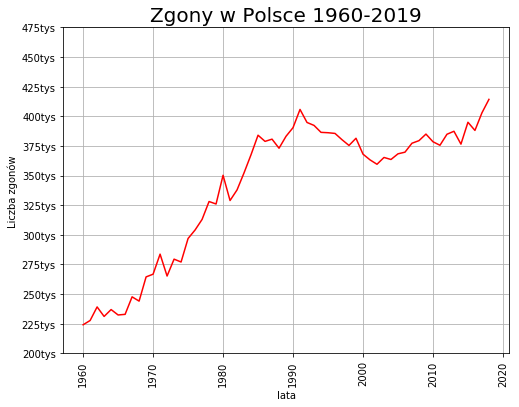

In [17]:
plt.rcParams['figure.figsize'] = 8,6
plt.plot(tabela_śmierci, c = 'Red')
plt.xticks(list(range(0, 70, 10)), ['1960', '1970', '1980', '1990','2000', '2010', '2020'], rotation = 'vertical')
plt.yticks(list(range(2*10**5, 5*10**5, 25*10**3)), 
           ['200tys', '225tys', '250tys', '275tys', '300tys', '325tys','350tys', 
            '375tys',  '400tys', '425tys', '450tys', '475tys', '500tys'])
plt.xlabel('lata')
plt.ylabel('Liczba zgonów')
plt.title("Zgony w Polsce 1960-2019", size = 20)
plt.grid()
plt.show()

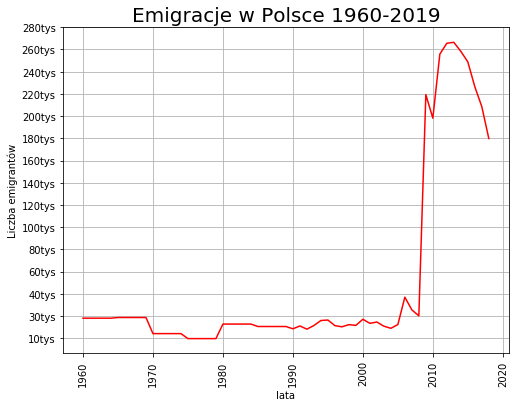

In [18]:
plt.rcParams['figure.figsize'] = 8,6
plt.plot(tabela_emigracji, c = 'Red')
plt.xticks(list(range(0, 70, 10)), ['1960', '1970', '1980', '1990','2000', '2010', '2020'], rotation = 'vertical')
plt.yticks(list(range(10**4, 3*10**5, 2*10**4)), 
           ['10tys', '30tys','40tys', '60tys','80tys', '100tys','120tys', '140tys',
            '160tys','180tys','200tys', '220tys', '240tys','260tys','280tys','300tys'])
plt.xlabel('lata')
plt.ylabel('Liczba emigrantów')
plt.title("Emigracje w Polsce 1960-2019", size = 20)
plt.grid()
plt.show()

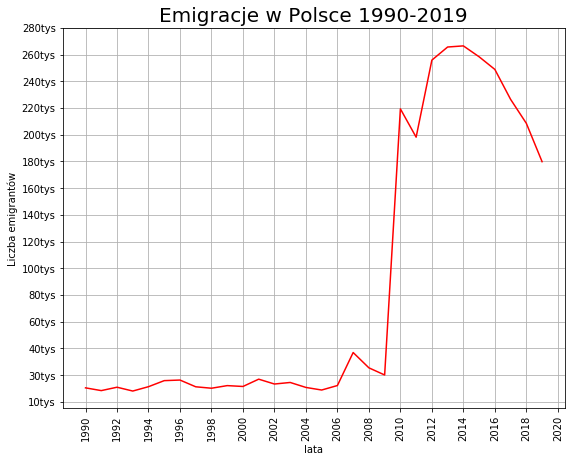

In [24]:
plt.rcParams['figure.figsize'] = 9,7
plt.plot(tabela_emigracji[29:], c = 'Red')
plt.xticks(list(range(0, 32, 2)), ['1990','1992','1994','1996','1998','2000','2002','2004','2006',
                                    '2008', '2010','2012','2014','2016','2018','2020'], rotation = 'vertical')
plt.yticks(list(range(10**4, 3*10**5, 2*10**4)), 
           ['10tys', '30tys','40tys', '60tys','80tys', '100tys','120tys', '140tys',
            '160tys','180tys','200tys', '220tys', '240tys','260tys','280tys','300tys'])
plt.xlabel('lata')
plt.ylabel('Liczba emigrantów')
plt.title("Emigracje w Polsce 1990-2019", size = 20)
plt.grid()
plt.show()

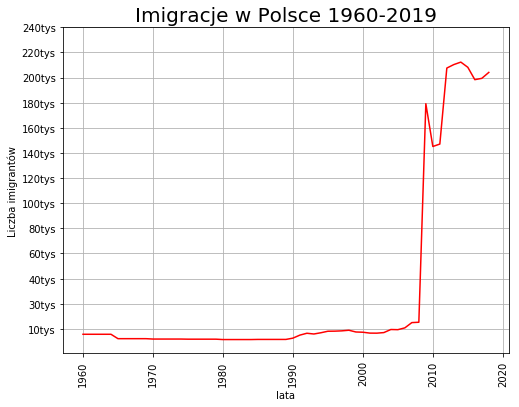

In [23]:
plt.rcParams['figure.figsize'] = 8,6
plt.plot(tabela_imigracji, c = 'Red')
plt.xticks(list(range(0, 70, 10)), ['1960', '1970', '1980', '1990','2000', '2010', '2020'], rotation = 'vertical')
plt.yticks(list(range(10**4, 26*10**4, 2*10**4)), 
           ['10tys', '30tys','40tys', '60tys','80tys', '100tys','120tys', '140tys',
            '160tys','180tys','200tys', '220tys', '240tys'])
plt.xlabel('lata')
plt.ylabel('Liczba imigrantów')
plt.title("Imigracje w Polsce 1960-2019", size = 20)
plt.grid()
plt.show()

##### Symulacja 1

Naszą pierwszą sytuacją, która mogłaby zaistnieć i znacząco wpłynąć na zmianę liczby ludności jest rozwój obecnej pandemii koronawirusa. Założenia, które przyjmujemy to:

-niewielkie zmniejszenie liczby żywych urodzeń,

-duży wzrost zgonów,

-spory spadek migracji w kraju z powodu ograniczeń przemieszczania.

Zakładamy, że koronawirus zmutował oraz jest odporny na wszelkie szczepionki. Coraz więcej ludzi umiera, jest także coraz mniej żywych urodzeń. Dopiero po czasie u ludzi wytwarzają się przeciwciała i krzywa opisująca zgony nie rośnie już tak gwałtownie, a krzywa przedstawiająca żywe urodzenia wypłaszcza się. Obostrzenia są jednak coraz większe. Rząd chce uniknąć możliwej kolejnej mutacji wirusa, dlatego zamyka granice. Ludzie mogą wyjeżdżać i przyjeżdżać do naszego kraju tylko w szczególnych przypadkach, dlatego migracje spadają w gwałtownym tempie praktycznie do zera. 

Zdefiniujemy teraz funkcję dla każdego współczynnika w taki sposób, aby zgadzało się to z naszymi założeniami. Sprawdzimy również jak będzie to wyglądać na wykresie.

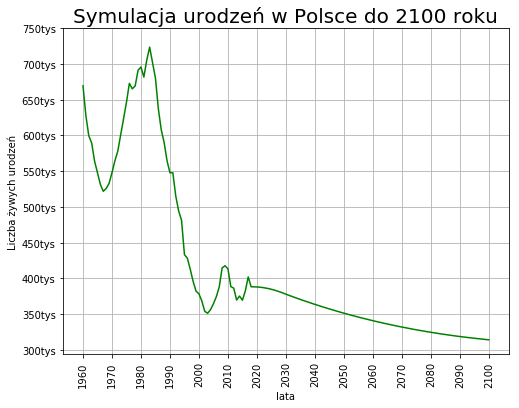

In [24]:
def urodzenia_symulacja1():
    b = 388178
    tabela_urodzeń1 = [669485, 627624, 599505, 589349, 563921, 547397, 531316, 521817, 525751, 532828, 
                  547819, 564381, 577893, 600862, 623650, 646381, 672864, 665221, 669312, 691229, 
                  695759, 681657, 705356, 723605, 701720, 680091, 637213, 607790, 589938, 564431, 
                  547720, 547719, 515214, 494310, 481285, 433109, 428203, 412635, 395619, 382002, 
                  378348, 368205, 353765, 351072, 356131, 364383, 374244, 387873, 414499, 417589, 
                  413300, 388416, 386257, 369576, 375160, 369308, 382257, 401982, 388178]
    wsp = 0.9999
    if len(tabela_urodzeń1) < 140:
        for i in range(82):
            bk = wsp * b
            tabela_urodzeń1.append(bk)
            b = bk
            if i < 10:               
                wsp = wsp - 0.0004
            else:
                wsp = wsp + 0.00004
        
        return tabela_urodzeń1

plt.rcParams['figure.figsize'] = 8,6
plt.plot(urodzenia_symulacja1(), c = 'Green')
plt.xticks(list(range(0, 150, 10)), ['1960', '1970', '1980', '1990','2000', '2010', '2020', '2030', '2040',
                                     '2050', '2060', '2070', '2080', '2090', '2100'], rotation = 'vertical')
plt.yticks(list(range(3*10**5, 8*10**5, 5*10**4)), 
           ['300tys', '350tys', '400tys', '450tys', '500tys', '550tys', '600tys', '650tys', '700tys', '750tys'])
plt.xlabel('lata')
plt.ylabel('Liczba żywych urodzeń')
plt.title("Symulacja urodzeń w Polsce do 2100 roku", size = 20)
plt.grid()
plt.show()

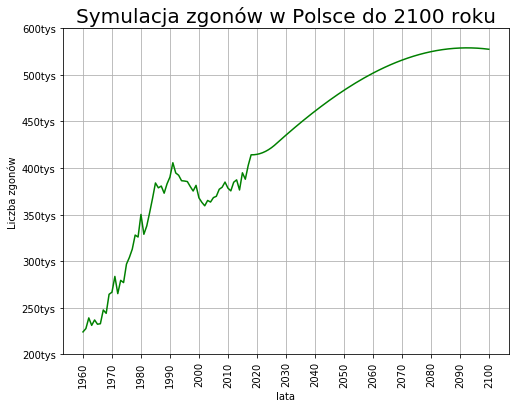

In [25]:
def śmierć_symulacja1():
    d = 414200
    tabela_śmierci1 = [224167, 227759, 239199, 231186, 236985, 232421, 232945, 247705, 244103, 
                  264516, 266799, 283702, 265250, 279491, 277085, 296896, 304057, 312956, 
                  328080, 325984, 350203, 328923, 337874, 352255, 367562, 383987, 378781, 
                  380663, 373018, 383074, 390343, 405716, 394729, 392259, 386398, 386084, 
                  385496, 380201, 375354, 381415, 368028, 363220, 359486, 365230, 363522, 
                  368285, 369686, 377226, 379399, 384940, 378478, 375501, 384788, 387312, 
                  376467, 394921, 388009, 402852, 414200 ]
    wsp = 1.0002
    if len(tabela_śmierci1) < 140:
        for i in range(82):
            dk = wsp * d
            tabela_śmierci1.append(dk)
            d = dk
            if i < 8:               
                wsp = wsp + 0.0008
            else:
                wsp = wsp - 0.0001
                
    return tabela_śmierci1
                
plt.rcParams['figure.figsize'] = 8,6
plt.plot(śmierć_symulacja1(), c = 'Green')
plt.xticks(list(range(0, 150, 10)), ['1960', '1970', '1980', '1990','2000', '2010', '2020', '2030', '2040',
                                     '2050', '2060', '2070', '2080', '2090', '2100'], rotation = 'vertical')
plt.yticks(list(range(2*10**5, 6*10**5, 5*10**4)), 
           ['200tys', '250tys','300tys', '350tys', '400tys', '450tys', '500tys', '600tys', '650tys'])
plt.xlabel('lata')
plt.ylabel('Liczba zgonów')
plt.title("Symulacja zgonów w Polsce do 2100 roku", size = 20)
plt.grid()
plt.show()
    

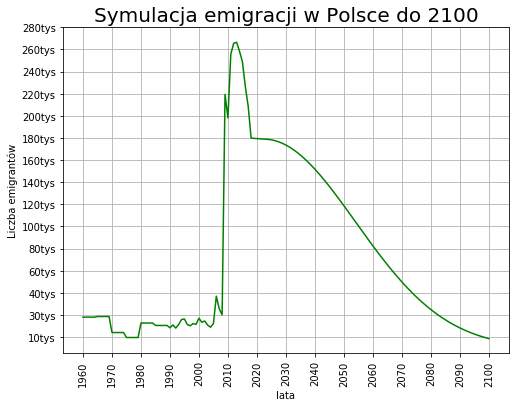

In [26]:
def emigracja_symulacja1():
    e = 189794
    tabela_emigracji1 = [28000, 28000, 28000, 28000, 28000, 28600, 28600, 28600, 28600, 28600,
                    14100, 14100, 14100, 14100, 14100, 9600, 9600, 9600, 9600, 9600,
                    22700, 22700, 22700, 22700, 22700, 20500, 20500, 20500, 20500, 20500,
                    18440, 20977, 18115, 21376, 25904, 26344, 21297, 20222, 22177, 21536, 
                    26999, 23368, 24532, 20813, 18877, 22242, 46936, 35480, 30140, 229320, 
                    208126, 265798, 275603, 276446, 268299, 258837, 236441, 218492, 189794]
    wsp = 0.999
    if len(tabela_emigracji1) < 140:
        for i in range(82):
            ek = wsp * e
            tabela_emigracji1.append(ek)
            e = ek
            if i < 5:               
                wsp = wsp - 0.00001
            else:
                wsp = wsp - 0.001
            
    return tabela_emigracji1      
            
plt.rcParams['figure.figsize'] = 8,6
plt.plot(emigracja_symulacja1(),c = 'Green')
plt.xticks(list(range(0, 150, 10)), ['1960', '1970', '1980', '1990','2000', '2010', '2020', '2030', '2040',
                                    '2050', '2060', '2070', '2080', '2090', '2100'], rotation = 'vertical')
plt.yticks(list(range(10**4, 3*10**5, 2*10**4)), 
           ['10tys', '30tys','40tys', '60tys','80tys', '100tys','120tys', '140tys',
            '160tys','180tys','200tys', '220tys', '240tys','260tys','280tys','300tys'])
plt.xlabel('lata')
plt.ylabel('Liczba emigrantów')
plt.title("Symulacja emigracji w Polsce do 2100", size = 20)
plt.grid()
plt.show()

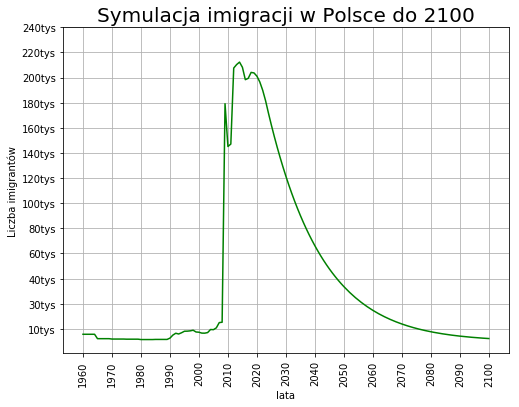

In [27]:
def imigracja_symulacja1():
    i = 214083
    tabela_imigracji1 = [5700, 5700, 5700, 5700, 5700, 2200, 2200, 2200, 2200, 2200,
                    1900, 1900, 1900, 1900, 1900, 1800, 1800, 1800, 1800, 1800,
                    1500,  1500,  1500,  1500,  1500, 1600, 1600, 1600, 1600, 1600, 
                    2626, 5040, 6512, 5924, 6907, 8121, 8186, 8426, 8916, 7525, 
                    7331, 6625, 6587, 7048, 9495, 9364, 10802, 14995, 15275, 189166, 
                    155131, 157059, 217546, 220311, 222275, 218147, 208302, 209353, 214083]
    wsp = 0.998
    if len(tabela_imigracji1) < 140:
        for j in range(82):
            ik = wsp * i
            tabela_imigracji1.append(ik)
            i = ik
            if j < 5:               
                wsp = wsp - 0.01
            else:
                wsp = wsp - 0.0001
                
    return tabela_imigracji1

plt.rcParams['figure.figsize'] = 8,6
plt.plot(imigracja_symulacja1(),c = 'Green')
plt.xticks(list(range(0, 150, 10)), ['1960', '1970', '1980', '1990','2000', '2010', '2020', '2030', '2040',
                                     '2050', '2060', '2070', '2080', '2090', '2100'], rotation = 'vertical')
plt.yticks(list(range(10**4, 26*10**4, 2*10**4)), 
           ['10tys', '30tys','40tys', '60tys','80tys', '100tys','120tys', '140tys',
            '160tys','180tys','200tys', '220tys', '240tys'])
plt.xlabel('lata')
plt.ylabel('Liczba imigrantów')
plt.title("Symulacja imigracji w Polsce do 2100", size = 20)
plt.grid()
plt.show()

Mając zdefiniowane funkcje opisujące współczynniki możemy przystąpić do rozwiązania równania bilansu, które będzie symulacją pierwszej sytuacji zmiany ludności w Polsce do 2100 roku.

In [28]:
def równanie_bilansu_symulacja_1(t1, t2):
    liczba_ludności = [tabela_pop[t1]]
    N = tabela_pop[t1]
    for k in range(t1, t2):
        b = urodzenia_symulacja1()[k-1960]
        d = śmierć_symulacja1()[k-1960]
        e = emigracja_symulacja1()[k-1960]
        i = imigracja_symulacja1()[k-1960]
        Pr = b - d - e + i
        liczba_ludności.append(N + Pr)
        N += Pr
    return(liczba_ludności)

In [29]:
round(równanie_bilansu_symulacja_1(1960, 2100)[140])

23460798.0

Według naszej pierwszej symulacji liczba ludności w Polsce w 2100 roku będzie wynosić 23460798.

Sprawdźmy jak wygląda to na wykresie.

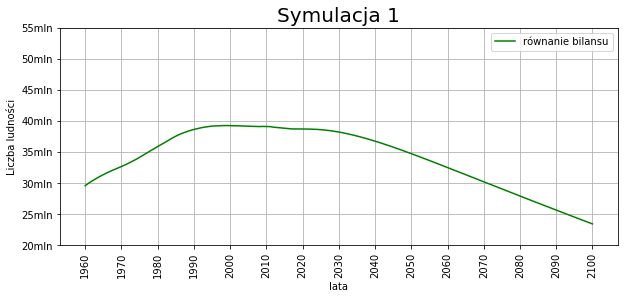

In [30]:
t2 = range(1960, 2101)
N2 = równanie_bilansu_symulacja_1(1960,2100)
plt.rcParams['figure.figsize'] = 10,4
plt.plot(t2,N2, label = "równanie bilansu", c = 'Green') 
plt.xlabel('lata')
plt.ylabel('Liczba ludności')
plt.legend(loc = 'Upper Left', bbox_to_anchor=(1,1))
plt.xticks(list(range(1960,2110,10)), rotation='vertical')
plt.yticks(list(range(2*10**7, 6*10**7, 5*10**6)), 
           ['20mln', '25mln', '30mln', '35mln', '40mln', '45mln', '50mln','55mln', '60mln'])
plt.title("Symulacja 1", size = 20)
plt.grid()
plt.show()

##### Symulacja 2

Drugą naszą symulacją jest Polska jako potęga gospodarcza na świecie. Założenia, które przyjmujemy to:

-zmniejszenie liczby zgonów,

-niewielki wzrost żywych urodzeń,

-duży wzrost imigracji,

-spory spadek emigracji.

Załóżmy, że Polska stała się na tyle silna, że nie jest ona zależna od nikogo. Koncerny farmaceutyczne stworzyły lek na raka, stąd spadek liczby zgonów w Polsce w następnych latach, a ludzie coraz chętniej zakładają rodzinę z powodu dobrych warunków do życia (wzrost liczby urodzeń na przestrzeni lat). Imigracja przybywa, natomiast emigracja spada, ponieważ ludzie nie chcą opuszczać tak wspaniałego i potężnego państwa. 

Definiowanie funkcji oraz rozwiązanie równania bilansu odbywa się analogicznie do symulacji 1.

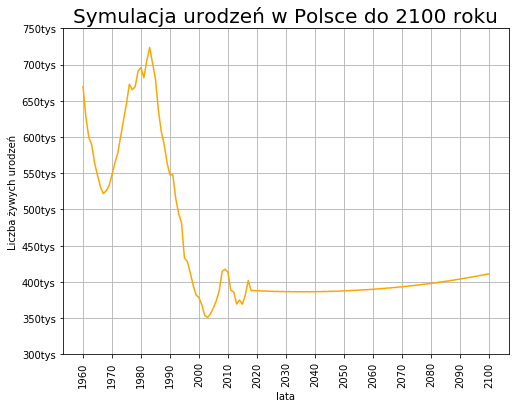

In [31]:
def urodzenia_symulacja2():
    b = 388178
    tabela_urodzeń2 = [669485, 627624, 599505, 589349, 563921, 547397, 531316, 521817, 525751, 532828, 
                  547819, 564381, 577893, 600862, 623650, 646381, 672864, 665221, 669312, 691229, 
                  695759, 681657, 705356, 723605, 701720, 680091, 637213, 607790, 589938, 564431, 
                  547720, 547719, 515214, 494310, 481285, 433109, 428203, 412635, 395619, 382002, 
                  378348, 368205, 353765, 351072, 356131, 364383, 374244, 387873, 414499, 417589, 
                  413300, 388416, 386257, 369576, 375160, 369308, 382257, 401982, 388178]
    wsp = 1
    if len(tabela_urodzeń2) < 140:
        for i in range(82):
            bk = wsp * b
            tabela_urodzeń2.append(bk)
            b = bk
            if i%2 == 0:               
                wsp = wsp - 0.001
            else:
                wsp = wsp + 0.00106
        
        return tabela_urodzeń2
        
plt.rcParams['figure.figsize'] = 8,6
plt.plot(urodzenia_symulacja2(), c = 'Orange')
plt.xticks(list(range(0, 150, 10)), ['1960', '1970', '1980', '1990','2000', '2010', '2020', '2030', '2040',
                                     '2050', '2060', '2070', '2080', '2090', '2100'], rotation = 'vertical')
plt.yticks(list(range(3*10**5, 8*10**5, 5*10**4)), 
           ['300tys', '350tys', '400tys', '450tys', '500tys', '550tys', '600tys', '650tys', '700tys', '750tys'])
plt.xlabel('lata')
plt.ylabel('Liczba żywych urodzeń')
plt.title("Symulacja urodzeń w Polsce do 2100 roku", size = 20)
plt.grid()
plt.show()

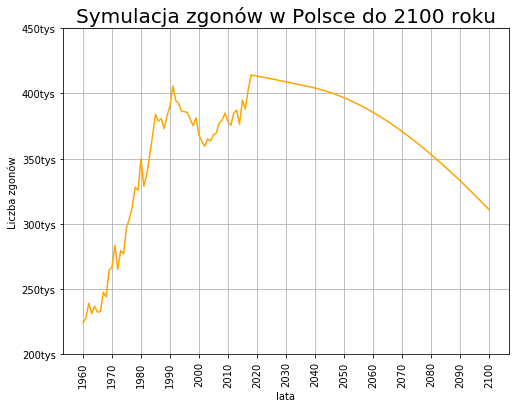

In [32]:
def śmierć_symulacja2():
    d = 414200
    tabela_śmierci2 = [224167, 227759, 239199, 231186, 236985, 232421, 232945, 247705, 244103, 
                  264516, 266799, 283702, 265250, 279491, 277085, 296896, 304057, 312956, 
                  328080, 325984, 350203, 328923, 337874, 352255, 367562, 383987, 378781, 
                  380663, 373018, 383074, 390343, 405716, 394729, 392259, 386398, 386084, 
                  385496, 380201, 375354, 381415, 368028, 363220, 359486, 365230, 363522, 
                  368285, 369686, 377226, 379399, 384940, 378478, 375501, 384788, 387312, 
                  376467, 394921, 388009, 402852, 414200 ]
    wsp = 0.999
    if len(tabela_śmierci2) < 140:
        for i in range(82):
            dk = wsp * d
            tabela_śmierci2.append(dk)
            d = dk
            if i < 20:               
                wsp = wsp - 0.00001
            else:
                wsp = wsp - 0.0001
                
    return tabela_śmierci2
                
plt.rcParams['figure.figsize'] = 8,6
plt.plot(śmierć_symulacja2(), c = 'Orange')
plt.xticks(list(range(0, 150, 10)), ['1960', '1970', '1980', '1990','2000', '2010', '2020', '2030', '2040',
                                     '2050', '2060', '2070', '2080', '2090', '2100'], rotation = 'vertical')
plt.yticks(list(range(2*10**5, 5*10**5, 5*10**4)), 
           ['200tys', '250tys','300tys', '350tys', '400tys', '450tys', '500tys'])
plt.xlabel('lata')
plt.ylabel('Liczba zgonów')
plt.title("Symulacja zgonów w Polsce do 2100 roku", size = 20)
plt.grid()
plt.show()

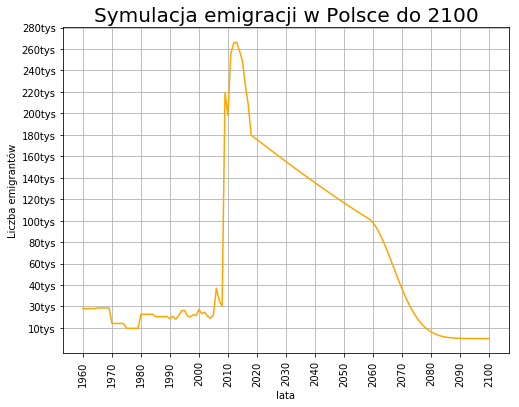

In [33]:
def emigracja_symulacja2():
    e = 189794
    tabela_emigracji2 = [28000, 28000, 28000, 28000, 28000, 28600, 28600, 28600, 28600, 28600,
                    14100, 14100, 14100, 14100, 14100, 9600, 9600, 9600, 9600, 9600,
                    22700, 22700, 22700, 22700, 22700, 20500, 20500, 20500, 20500, 20500,
                    18440, 20977, 18115, 21376, 25904, 26344, 21297, 20222, 22177, 21536, 
                    26999, 23368, 24532, 20813, 18877, 22242, 46936, 35480, 30140, 229320, 
                    208126, 265798, 275603, 276446, 268299, 258837, 236441, 218492, 189794]
    wsp = 0.989
    if len(tabela_emigracji2) < 140:
        for i in range(82):
            ek = wsp * e
            tabela_emigracji2.append(ek)
            e = ek
            if i < 40:               
                wsp = wsp - 0.0001
            else:
                wsp = wsp - 0.01
            
    return tabela_emigracji2      
            
plt.rcParams['figure.figsize'] = 8,6
plt.plot(emigracja_symulacja2(), c = 'Orange')
plt.xticks(list(range(0, 150, 10)), ['1960', '1970', '1980', '1990','2000', '2010', '2020', '2030', '2040',
                                     '2050', '2060', '2070', '2080', '2090', '2100'], rotation = 'vertical')
plt.yticks(list(range(10**4, 3*10**5, 2*10**4)), 
           ['10tys', '30tys','40tys', '60tys','80tys', '100tys','120tys', '140tys',
            '160tys','180tys','200tys', '220tys', '240tys','260tys','280tys','300tys'])
plt.xlabel('lata')
plt.ylabel('Liczba emigrantów')
plt.title("Symulacja emigracji w Polsce do 2100", size = 20)
plt.grid()
plt.show()

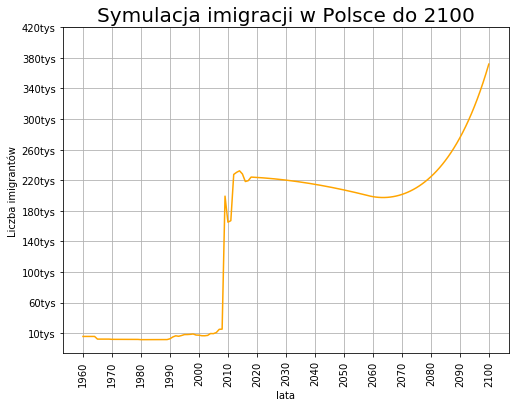

In [34]:
def imigracja_symulacja2():
    i = 214083
    tabela_imigracji2 = [5700, 5700, 5700, 5700, 5700, 2200, 2200, 2200, 2200, 2200,
                    1900, 1900, 1900, 1900, 1900, 1800, 1800, 1800, 1800, 1800,
                    1500,  1500,  1500,  1500,  1500, 1600, 1600, 1600, 1600, 1600, 
                    2626, 5040, 6512, 5924, 6907, 8121, 8186, 8426, 8916, 7525, 
                    7331, 6625, 6587, 7048, 9495, 9364, 10802, 14995, 15275, 189166, 
                    155131, 157059, 217546, 220311, 222275, 218147, 208302, 209353, 214083]
    wsp = 0.999
    if len(tabela_imigracji2) < 140:
        for j in range(82):
            ik = wsp * i
            tabela_imigracji2.append(ik)
            i = ik
            if j < 40:               
                wsp = wsp - 0.0001
            else:
                wsp = wsp + 0.001
                
    return tabela_imigracji2

plt.rcParams['figure.figsize'] = 8,6
plt.plot(imigracja_symulacja2(), c = 'Orange')
plt.xticks(list(range(0, 150, 10)), ['1960', '1970', '1980', '1990','2000', '2010', '2020', '2030', '2040',
                                     '2050', '2060', '2070', '2080', '2090', '2100'], rotation = 'vertical')
plt.yticks(list(range(10**4, 42*10**4, 4*10**4)), 
           ['10tys','60tys','100tys','140tys', '180tys','220tys','260tys',
            '300tys', '340tys','380tys','420tys'])
plt.xlabel('lata')
plt.ylabel('Liczba imigrantów')
plt.title("Symulacja imigracji w Polsce do 2100", size = 20)
plt.grid()
plt.show()

In [35]:
def równanie_bilansu_symulacja_2(t1, t2):
    liczba_ludności = [tabela_pop[t1]]
    N = tabela_pop[t1]
    for k in range(t1, t2):
        b = urodzenia_symulacja2()[k-1960]
        d = śmierć_symulacja2()[k-1960]
        e = emigracja_symulacja2()[k-1960]
        i = imigracja_symulacja2()[k-1960]
        Pr = b - d - e + i
        liczba_ludności.append(N + Pr)
        N += Pr
    return(liczba_ludności)

In [36]:
round(równanie_bilansu_symulacja_2(1960, 2100)[140])

50389154.0

Według naszej pierwszej symulacji liczba ludności w Polsce w 2100 roku będzie wynosić 50389154.

Spójrzmy na wykres naszej drugiej symulacji.

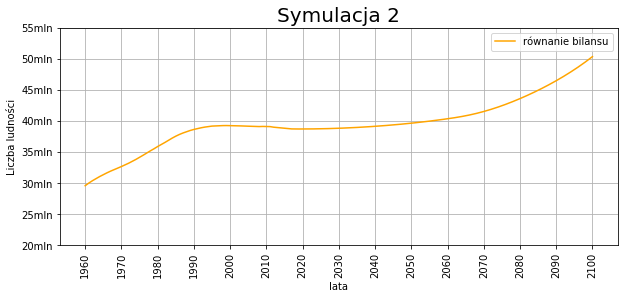

In [37]:
t3 = range(1960, 2101)
N3 = równanie_bilansu_symulacja_2(1960,2100)
plt.rcParams['figure.figsize'] = 10,4
plt.plot(t3,N3, label = "równanie bilansu", c = 'Orange') 
plt.xlabel('lata')
plt.ylabel('Liczba ludności')
plt.legend(loc = 'Upper Left', bbox_to_anchor=(1,1))
plt.xticks(list(range(1960,2110,10)), rotation='vertical')
plt.yticks(list(range(2*10**7, 6*10**7, 5*10**6)), 
           ['20mln', '25mln', '30mln', '35mln', '40mln', '45mln', '50mln','55mln', '60mln'])
plt.title("Symulacja 2", size = 20)
plt.grid()
plt.show()


Przedstawimy teraz zestawienie obydwóch symulacji na jednym wykresie.

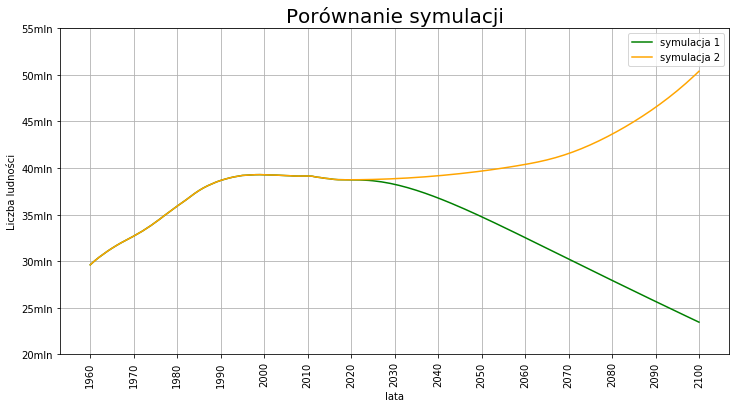

In [38]:
t4 = range(1960, 2101)
N4 = równanie_bilansu_symulacja_2(1960,2100)
N3 = równanie_bilansu_symulacja_1(1960,2100)
plt.rcParams['figure.figsize'] = 12,6
plt.plot(t3,N3, label = "symulacja 1", c = 'Green') 
plt.plot(t4,N4, label = "symulacja 2", c = 'Orange')
plt.xlabel('lata')
plt.ylabel('Liczba ludności')
plt.legend(loc = 'Upper Left', bbox_to_anchor=(1,1))
plt.xticks(list(range(1960,2110,10)), rotation='vertical')
plt.yticks(list(range(2*10**7, 6*10**7, 5*10**6)), 
           ['20mln', '25mln', '30mln', '35mln', '40mln', '45mln', '50mln','55mln', '60mln'])
plt.title("Porównanie symulacji", size = 20)
plt.grid()
plt.show()

Jak możemy zauważyć są to dwie zupełnie rozbieżne sytuacje. W pierwszej z nich liczba ludności spada do około 23 mln, a w drugiej wzrasta aż do ponad 50 mln.

Spójrzmy teraz na porównanie naszych symulacji z danymi i przewidywaniami naukowców. Najpierw w latach 1960-2100, a następnie tylko lata 2020-2100.

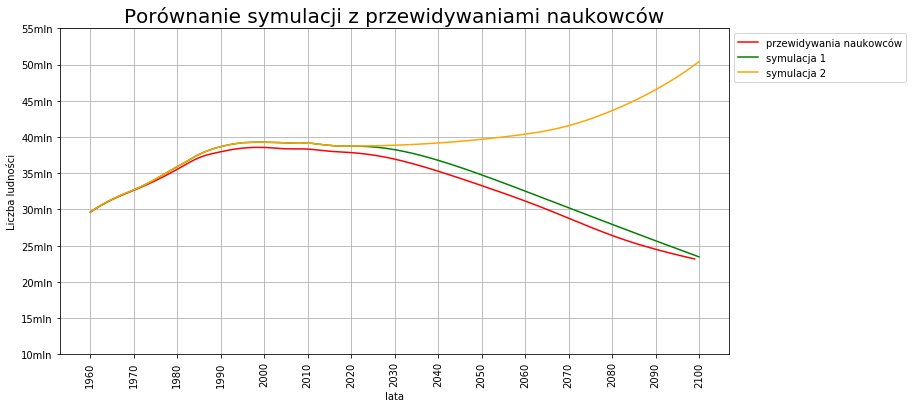

In [39]:
def porównanie2(t1, t2):
    t4 = range(t1, t2+1)
    N4 = równanie_bilansu_symulacja_2(t1,t2)
    N3 = równanie_bilansu_symulacja_1(t1,t2)
    
    plt.rcParams['figure.figsize'] = 12,6
    plt.plot(tabela_pop.index[t1-1950 : t2-1950], tabela_pop[t1-1950 : t2-1950], c='Red', label = 'przewidywania naukowców') 
    plt.plot(t4,N3, label = "symulacja 1", c = 'Green') 
    plt.plot(t4,N4, label = "symulacja 2", c = 'Orange')
    plt.xlabel('lata')
    plt.ylabel('Liczba ludności')
    plt.legend(loc = 'Upper Left', bbox_to_anchor=(1,1))
    plt.xticks(list(range(t1,t2+10,10)), rotation='vertical')
    plt.yticks(list(range(10**7, 6*10**7, 5*10**6)), 
               ['10mln', '15mln', '20mln', '25mln', '30mln', '35mln', '40mln', '45mln', '50mln', '55mln', '60mln'])
    plt.title("Porównanie symulacji z przewidywaniami naukowców", size = 20)
    plt.grid()
    plt.show()
    
porównanie2(1960,2100)

Teraz lata 2020-2100.

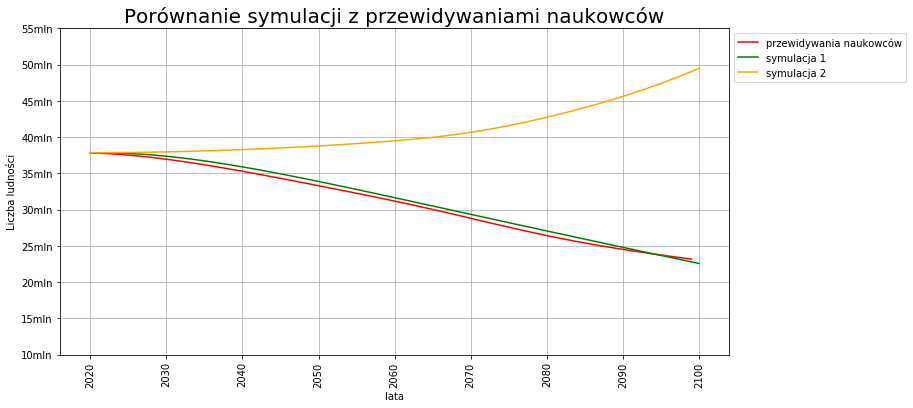

In [40]:
porównanie2(2020,2100)

Symulacja 1 (rozwój pandemii i mutacja wirusa) i przewidywania naukowców są bardzo bliskie pokrycia. Możemy więc wnioskować, że opisana przez nas sytuacja w symulacji 1 mogłaby zaistnieć w prawdziwym życiu. Natomiast symulacja 2 (Polska staje się potęgą gospodarczą) bardzo odbiega od spekulacji naukowych. 

### Podsumowanie

Zobaczmy na koniec, jak przedstawiają się przewidywania liczby ludności w Polsce w roku 2100 według:

naukowców - 23032569,

modelu Malthusa - 68425396,

modelu Verhulsta - 38567868,

naszej pierwszej symulacji (równanie bilansu) - 23460798,

naszej drugiej symulacji (równanie bilansu) - 50389154.

Dla lepszego zobrazowania sprawdźmy jak będzie wyglądać wykres porównawczy uwzględniający nasze symulacje, modele demograficzne Mathusa i Verhulsta oraz dane i przewidywania naukowe. Tak jak wcześniej - najpierw lata 1960-2100, a następnie 2020-2100.

Lata 2020-2100.

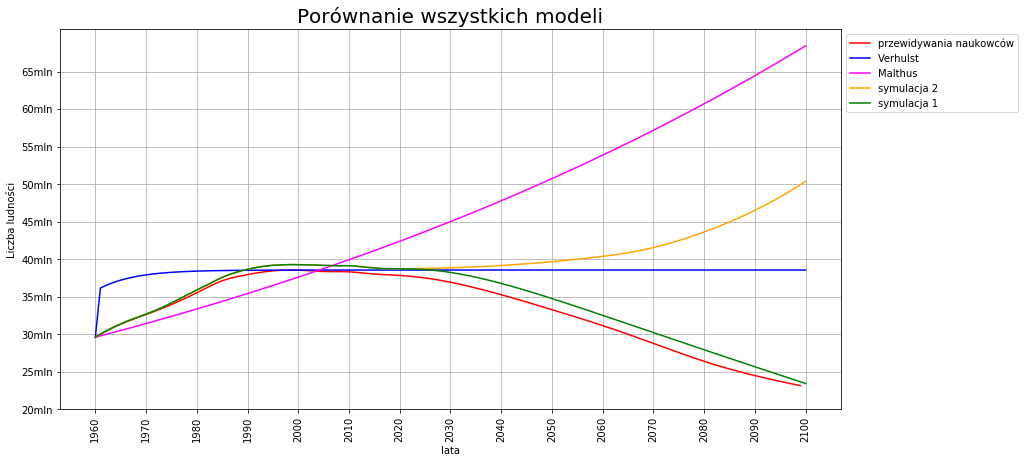

In [44]:
def porównanie3(t1, t2):
    
    t = range(t1,t2+1)
    N1 = Verhulst(t1,t2)
    N2 = Malthus(t1,t2)
    N4 = równanie_bilansu_symulacja_2(t1,t2)
    N3 = równanie_bilansu_symulacja_1(t1,t2)
    
    plt.rcParams['figure.figsize'] = 14,7
    plt.plot(tabela_pop.index[t1-1950 : t2-1950], tabela_pop[t1-1950 : t2-1950], c='Red', label = 'przewidywania naukowców') 
    plt.plot(t, N1, label = 'Verhulst', c = 'Blue')
    plt.plot(t, N2, label = 'Malthus', c = 'Magenta')
    plt.plot(t, N4, label = "symulacja 2", c = 'Orange')
    plt.plot(t, N3, label = "symulacja 1", c = 'Green') 
    plt.xlabel('lata')
    plt.ylabel('Liczba ludności')
    plt.legend(loc = 'Upper Left', bbox_to_anchor=(1,1))
    plt.xticks(list(range(t1,t2+10,10)), rotation='vertical')
    plt.yticks(list(range(2*10**7, 7*10**7, 5*10**6)), 
               ['20mln', '25mln', '30mln', '35mln', '40mln', '45mln', '50mln',
                '55mln', '60mln', '65mln', '70mln'])
    plt.title("Porównanie wszystkich modeli", size = 20)
    plt.grid()
    plt.show()
    
porównanie3(1960,2100)

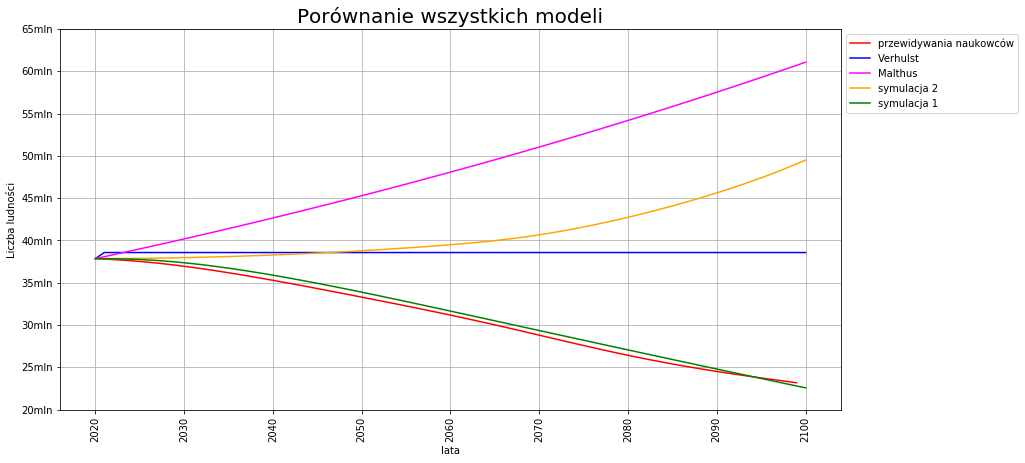

In [43]:
porównanie3(2020,2100)

Z wykresu możemy odczytać, że tylko model Verhulsta zakłada, że liczba ludności w Polsce do 2100 roku pozostanie stabilna. Model Malthusa oraz symulacja 2 pokazują, że liczba ludności mogłaby drastycznie wzrosnąć. Natomiast symulacja 1 oraz przewidywania naukowe mówią, że populacja w naszym kraju zmaleje. Nie możemy przewidzieć jak sytuacja w naszym kraju zmieni się w przeciągu najbliższych 80 lat, więc wszystkie te funkcje są jedynie spekulacjami. Biorąc jednak za punkt odniesienia przewidywania naukowców możemy wywnioskować, że najlepiej sprawdza się tutaj równanie bilansu z naszymi założeniami. 
Do obecnego roku również najlepiej poradził sobie ten model. Dzieje się tak dlatego, że uwzględnia on wszystkie rzeczywiste czynniki wpływające na zmianę liczby ludności. Model Verhulsta i Malthusa nie bierze pod uwagę tych czynników, dlatego wyniki nie są tak rzetelne oraz znacząco odbiegają od prawdy. 

Proste modele demograficzne, przyjmując idealne warunki, dobrze oddają rzeczywistość i sprawdzą się przy badaniu populacji hermetycznej np. bakteri w laboratorium. W przypadku bardziej złożonym lepiej jest wybrać model uwzględniający czynniki zależne od czasu i mające największy wpływ na zmianę liczby ludności. 